In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm_notebook as tqdm
fps = glob('/home/rob/Downloads/aligned*.tif')


In [2]:
imgs = []
for fp in fps:
    img = cv2.imread(fp)
    imgs += [img]
imgs = np.array(imgs)

In [3]:
height, width = img.shape[:2]
size = 20
out = np.ones(img.shape[:3])
for i in tqdm(range(height//size)):
    for j in range(width//size):
        sx = i*size
        ex = (i+1)*size
        sy = j*size
        ey = (j+1)*size
        ey = min(ey,width)
        ex = min(ex,height)
        
        squs = imgs[:,sx:ex,sy:ey]
        variances = []
        for squ in squs:
            variances += [cv2.Laplacian(squ, cv2.CV_64F).var()]
        best = np.argmax(variances)
        out[sx:ex,sy:ey] = squs[best]

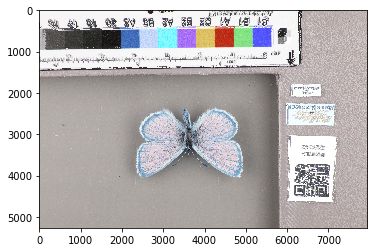

In [5]:
plt.imshow(cv2.cvtColorout.astype('uint8'))

In [36]:
out=cv2.cvtColor(out.astype('uint8'), cv2.COLOR_RGB2BGR)

In [37]:
cv2.imwrite('merged.tiff',out)

True

In [15]:
cv2.Laplacian(squs[0], cv2.CV_64F).var()

2.4364

In [7]:
out[sy:ey,sx:ex] = 10